### Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
 
from sklearn.metrics import confusion_matrix


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Import and Analise Original Data

In [3]:
#import dataset 

df = pd.read_csv('/content/drive/My Drive/AC/Drug_Consumption_Quantified.csv')

In [4]:
#understand the original data

df.head()
#df.describe()  #Returns a description summary for each column in the DataFrame
#df.info() #Prints information about the DataFrame
#df["Age"].all
#df.columns
#df.isnull()
#df.tail()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [5]:
#check unique values
df.nunique()
#df['Gender'].unique()

ID           1884
Age             6
Gender          2
Education       9
Country         7
Ethnicity       7
Nscore         49
Escore         42
Oscore         35
AScore         41
Cscore         41
Impulsive      10
SS             11
Alcohol         7
Amphet          7
Amyl            7
Benzos          7
Caff            7
Cannabis        7
Choc            7
Coke            7
Crack           7
Ecstasy         7
Heroin          7
Ketamine        7
Legalh          7
LSD             7
Meth            7
Mushrooms       7
Nicotine        7
Semer           5
VSA             7
dtype: int64

In [6]:
#check for null values
df.isnull().sum()#there is no null values

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
AScore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

### Clean and prepare Dataset 



In [7]:
print(f'Before: {df.shape[0]} rows and {df.shape[1]} columns')

Before: 1884 rows and 32 columns


In [8]:
#Delete Overclaimers - The statement tells us that Semer is a fictional drug, so we have to remove the people who claim to have consumed this drug, as they are not providing accurate information.
df = df.drop(df[df['Semer'] != 'CL0'].index)

#Let's eliminate the Ethnicity and Country columns as they are categorical data that we are not interested in, in addition, we will also remove the columns related to the drugs that we are not using.
df = df.drop(['ID','Country', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Semer', 'VSA', 'Ethnicity'] , axis=1) #remove columns from dataset 


In [9]:
print(f'After: {df.shape[0]} rows and {df.shape[1]} columns')

print('\n',df.columns)

After: 1876 rows and 13 columns

 Index(['Age', 'Gender', 'Education', 'Nscore', 'Escore', 'Oscore', 'AScore',
       'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Cannabis', 'Nicotine'],
      dtype='object')


In [10]:
#ENCODING DATA
#First Binary encode gender
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 0.48246 else 0) # 1-M // 0-F

In [11]:
# Encode ordinal features

#Here we define the values for the columns we want to change, and the names to which we want to change them.

original_coluns = ['Age', 
                    'Education',
                    'Alcohol',
                    'Cannabis',
                    'Nicotine',  ]


# Define original values
original_values = [
    [-0.95197, -0.07854, 0.49788, 1.09449, 1.82213, 2.59171],
    [-2.43591, 
     -1.73790, 
     -1.43719, 
     -1.22751,
     -0.61113,
     -0.05921,
     0.45468,
     1.16365,
     1.98437],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
]


In [12]:
#Create function for ordinal encoding

def encoder(df, columns, ordering):
    df = df.copy()
    for column, ordering in zip(original_coluns, original_values):
          df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

#Encoder execution
df = encoder(df, original_coluns, original_values)


In [13]:
# Encoding targets

drugs = [
         'Alcohol', 
         'Cannabis',
         'Nicotine']


def drug_encoder(x):
    if x == 0:
        return 0
    elif x == 1:
        return 0
    elif x == 2:
        return 0
    elif x == 3:
        return 1
    elif x == 4:
        return 1
    elif x == 5:
        return 1
    elif x == 6:
        return 1

for i in drugs: 
  
  df[i] = df[i].apply(drug_encoder) # 1-M // 0-F  



In [14]:
df.head() 

,Age,Gender,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Cannabis,Nicotine
0,1,0,8,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1
1,2,0,5,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,1,0
2,0,1,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0
3,2,1,8,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,0
4,5,1,3,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,1


### Exploratory data analysis

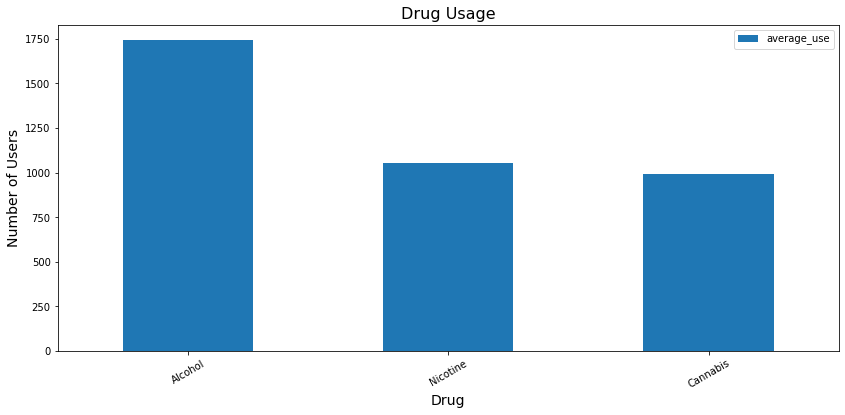

In [15]:
#Explanation on why we chose this 3 drugs - because they are de most consumed
drugs = ['Alcohol', 'Cannabis', 'Nicotine']

drug_count = []
for column in drugs:
    count = df[column].sum()
    drug_count.append(count)

drug_dic = {'drug': drugs,
            'average_use': drug_count}
drug_use = pd.DataFrame.from_dict(drug_dic)
drug_use = drug_use.sort_values(['average_use'], ascending=False)

drug_use.head()
drug_use.plot(kind='bar', x='drug', y='average_use', figsize=(14, 6))
plt.title('Drug Usage', size=16)
plt.xlabel('Drug', size=14)
plt.xticks(rotation=30)
plt.ylabel('Number of Users', size=14)
plt.show()

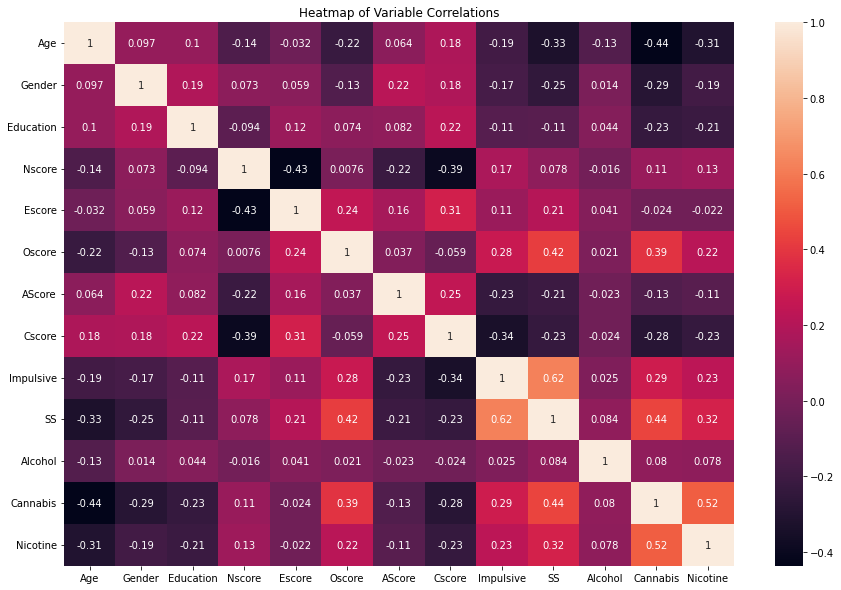

In [16]:
#Relationship analysis
corelation = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corelation,annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

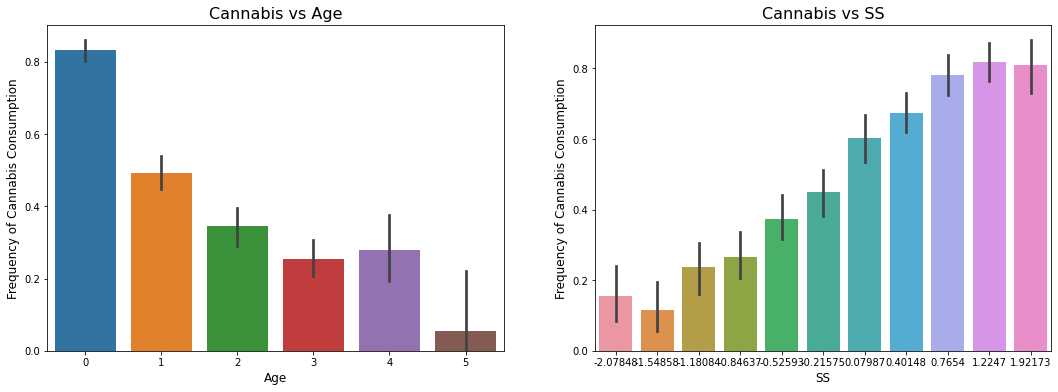

In [20]:
#Relation between nicotine_usage and age

f,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

sns.barplot(df, x='Age' , y='Cannabis', ax = ax1 )
sns.barplot(df, x='SS' , y='Cannabis', ax = ax2)
ax1.set_title('Cannabis vs Age', size=16)
ax1.set_xlabel('Age', size=12)
ax1.set_ylabel('Frequency of Cannabis Consumption', size=12)
ax2.set_title('Cannabis vs SS', size=16)
ax2.set_xlabel('SS', size=12)
ax2.set_ylabel('Frequency of Cannabis Consumption', size=12)
plt.show()


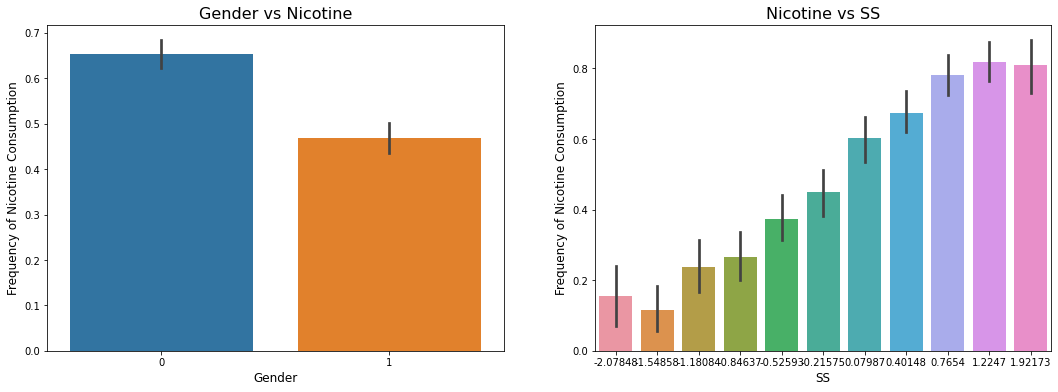

In [23]:
# plt.figure(figsize=(8,5))

# sns.barplot(data=df, x='Gender', y='Nicotine')
# plt.title('Nicotine vs Gender', size=16)
# plt.xlabel('Gender', size=12)
# plt.ylabel('Frequency of Nicotine Consumption', size=12)
# plt.show()


f,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

sns.barplot(df, x='Gender' , y='Nicotine', ax = ax1 )
sns.barplot(df, x='SS' , y='Cannabis', ax = ax2)
ax1.set_title('Gender vs Nicotine', size=16)
ax1.set_xlabel('Gender', size=12)
ax1.set_ylabel('Frequency of Nicotine Consumption', size=12)
ax2.set_title('Nicotine vs SS', size=16)
ax2.set_xlabel('SS', size=12)
ax2.set_ylabel('Frequency of Nicotine Consumption', size=12)
plt.show()





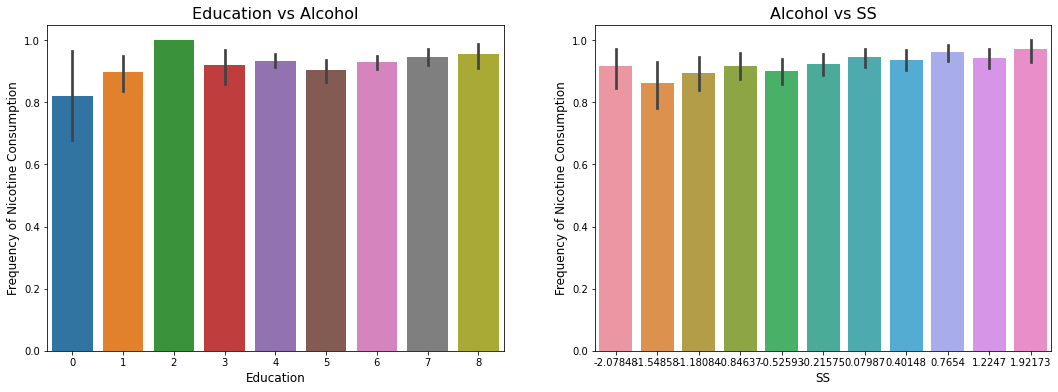

In [22]:
f,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

sns.barplot(df, x='Education' , y='Alcohol', ax = ax1 )
sns.barplot(df, x='SS' , y='Alcohol', ax = ax2)
ax1.set_title('Education vs Alcohol', size=16)
ax1.set_xlabel('Education', size=12)
ax1.set_ylabel('Frequency of Nicotine Consumption', size=12)
ax2.set_title('Alcohol vs SS', size=16)
ax2.set_xlabel('SS', size=12)
ax2.set_ylabel('Frequency of Nicotine Consumption', size=12)
plt.show()

### Decision Tree Classification

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report
from sklearn import tree


In [ ]:
#Build And Train Data 
def decisiontree(df, drug, features, criter):

    df = df.copy()
    
    # Split df into X and y
    y = df[drug]
    X = df[features]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    clf = DecisionTreeClassifier(criterion = criter, max_depth = 3, min_samples_leaf = 5, random_state=100)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)


    return X_train, X_test, y_train, y_test, y_pred, clf
    

In [ ]:
def print_results(y_pred, y_test): 

  print('Valores Previstos: \n ',y_pred)
  print("\n\nAccuracy:",metrics.accuracy_score(y_test, y_pred))

  
  cf_matrix = confusion_matrix(y_test,y_pred)
  print('\n Confusion Matrix: \n',cf_matrix)

  #Plot Confusion Matrix 
  print('\n')
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Cannabis Category')
  ax.set_ylabel('Actual Cannabis Category ');
  ## Display the visualization of the Confusion Matrix.
  plt.show()

  #Classification Report
  print('\n\nClassification Report: \n\n',classification_report(y_test, y_pred))
  
def plot_tree(clf, features):
  fig = plt.figure(figsize=(25,15))
  _= tree.plot_tree(clf,
                    feature_names=features,
                    class_names={0: 'User', 1:'Not User'}, 
                    filled = True, 
                    fontsize=12
  )

In [ ]:
# Classes to Predict 

drugs_predict = [
         'Alcohol', 
         'Cannabis',
         'Nicotine']

features = ['Age', 
            'Gender', 
            'Education', 
            'Nscore', 
            'Escore', 
            'Oscore', 
            'AScore',
            'Cscore', 
            'Impulsive', 
            'SS']

  


	Resultados Usando Entropia


Valores Previstos: 
  [0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0
 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0
 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0
 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1
 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 

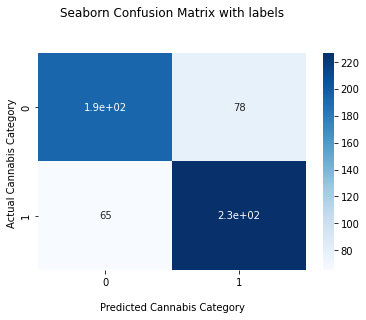



Classification Report: 

               precision    recall  f1-score   support

           0       0.75      0.71      0.73       271
           1       0.74      0.78      0.76       292

    accuracy                           0.75       563
   macro avg       0.75      0.74      0.75       563
weighted avg       0.75      0.75      0.75       563


	Resultados usando Gini


Valores Previstos: 
  [0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0
 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0
 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 

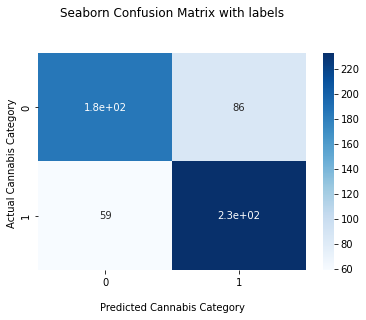



Classification Report: 

               precision    recall  f1-score   support

           0       0.76      0.68      0.72       271
           1       0.73      0.80      0.76       292

    accuracy                           0.74       563
   macro avg       0.74      0.74      0.74       563
weighted avg       0.74      0.74      0.74       563



In [ ]:
# Decision Tree Model 

# Test for Cannabis 
# We also can test other drugs by changing the parameter 
# Here we only test for Cannabis 

#Teste para o Cannabis - Entropy
X_train_Can, X_test_Can, y_train_Can, y_test_Can, y_pred_Can, clf_Can = decisiontree(df, 'Cannabis', features, 'entropy')
print('\n\tResultados Usando Entropia\n\n')
print_results(y_pred_Can, y_test_Can)

#Teste para o Cannabis - Gini 
X_train_Can, X_test_Can, y_train_Can, y_test_Can, y_pred_Can, clf_Can = decisiontree(df, 'Cannabis', features, 'gini')
print('\n\tResultados usando Gini\n\n')
print_results(y_pred_Can, y_test_Can)


# for i in range(len(drugs_predict)): 

#  print('\n\rDecision Tree for: ', drugs_predict[i], '// Criterion=Entropy','\n')
#  X_train_E, X_test_E, y_train_E, y_test_E, y_pred_E, clf_E = decisiontree(df, drugs_predict[i], features, 'entropy')
#  print_results(y_pred_E, y_test_E)

#  print('\n\rDecision Tree for: ', drugs_predict[i], '// Criterion=Gini','\n')
#  X_train_E, X_test_E, y_train_E, y_test_E, y_pred_E, clf_E = decisiontree(df, drugs_predict[i], features, 'gini')
#  print_results(y_pred_E, y_test_E)

#  print('\n\r ******************************************** \n\n')





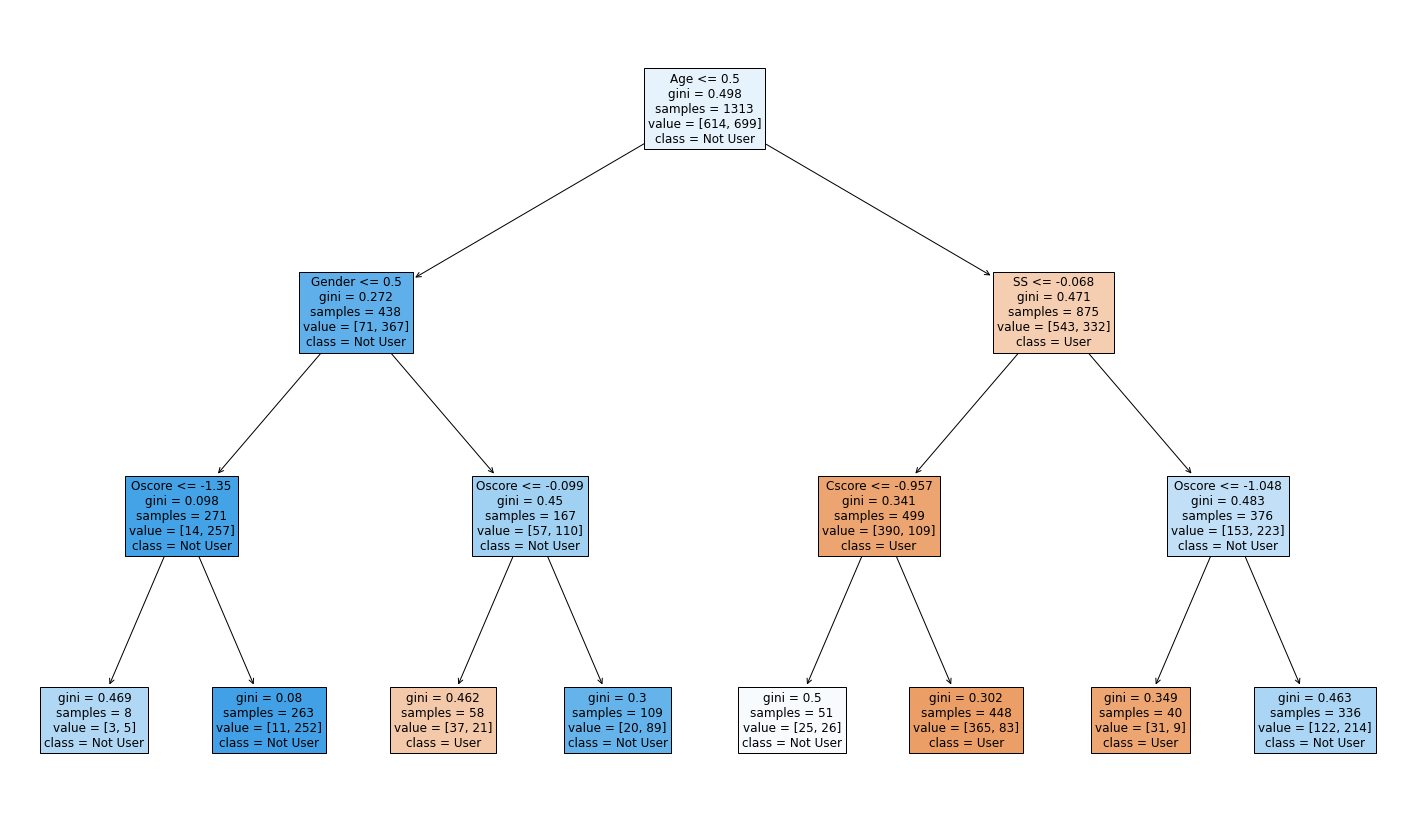

In [ ]:
plot_tree(clf_Can, features) 

### KNN - Algoritmo 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#KNN Classification Function 
def knn(df, drug, features, n_neigh):

    df = df.copy()
    
    # Split df into X and y
    y = df[drug]
    X = df[features]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Feature Scaling

    scaler=StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    # Training the K-NN model on the Training set

    clf = KNN(n_neighbors = n_neigh, metric = 'minkowski', p = 2)
    clf.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = clf.predict(X_test)


    return X_train, X_test, y_train, y_test, y_pred, clf
  

In [ ]:
#Evaluate the performance of the algorithm with different numbers of K-neighbours

def perform_knn (df, drug, features, k): 

  neighbors = np.arange(1, k)
  train_accuracy = np.empty(len(neighbors))
  test_accuracy = np.empty(len(neighbors))

# Loop over K values

  for i, k in enumerate(neighbors):
      
      X_train_Can, X_test_Can, y_train_Can, y_test_Can, y_pred_Can, clf_Can = knn(df, drug, features, k)

      # Compute training and test data accuracy
      train_accuracy[i] = clf_Can.score(X_train_Can, y_train_Can)
      test_accuracy[i] = clf_Can.score(X_test_Can, y_test_Can)


  # Generate plot
  plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
  plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

  plt.legend()
  plt.xlabel('n_neighbors')
  plt.ylabel('Accuracy')
  plt.show()





 Numbers of K-neighbours for  Alcohol 



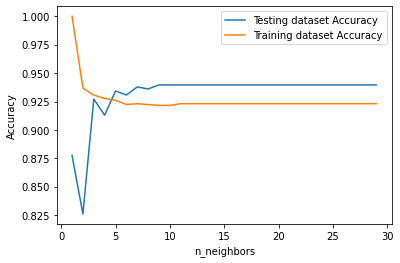


	 

 Numbers of K-neighbours for  Cannabis 



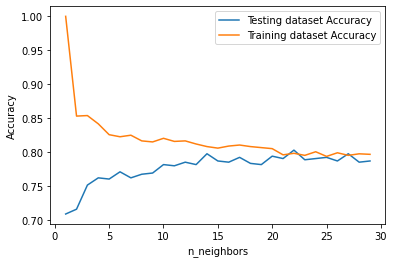


	 

 Numbers of K-neighbours for  Nicotine 



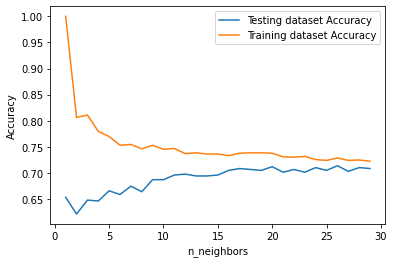

In [ ]:
# Evaluate the performance of the algorithm with different numbers of K-neighbours


n = range(len(drugs_predict))

for i in n: 
  print('\n\r Numbers of K-neighbours for ', drugs_predict[i],'\n')
  perform_knn(df, drugs_predict[i], features, 30)
  print('\n\t ')



	Resultados Usando KNN K=3


Valores Previstos: 
  [0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1
 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0
 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0
 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1
 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0

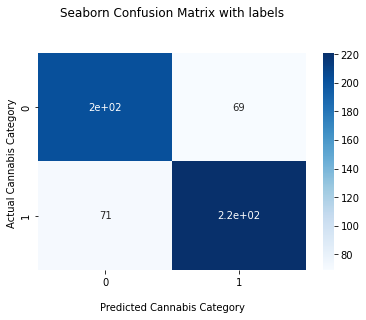



Classification Report: 

               precision    recall  f1-score   support

           0       0.74      0.75      0.74       271
           1       0.76      0.76      0.76       292

    accuracy                           0.75       563
   macro avg       0.75      0.75      0.75       563
weighted avg       0.75      0.75      0.75       563


	Resultados Usando KNN K=22


Valores Previstos: 
  [0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1
 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1
 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 

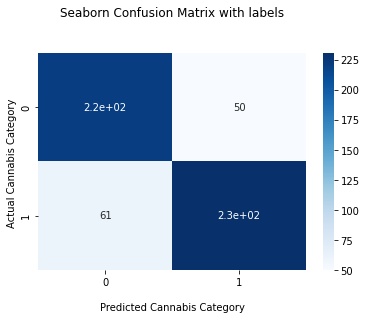



Classification Report: 

               precision    recall  f1-score   support

           0       0.78      0.82      0.80       271
           1       0.82      0.79      0.81       292

    accuracy                           0.80       563
   macro avg       0.80      0.80      0.80       563
weighted avg       0.80      0.80      0.80       563



In [ ]:
#KNN Classification for Cannabis 
#We can also test to other drugs 

X_train_Can, X_test_Can, y_train_Can, y_test_Can, y_pred_Can, clf_Can = knn(df, 'Cannabis', features, 3)
print('\n\tResultados Usando KNN K=3\n\n')
print_results(y_pred_Can, y_test_Can)


X_train_Can_15, X_test_Can_15, y_train_Can_15, y_test_Can_15, y_pred_Can_15, clf_Can_15 = knn(df, 'Cannabis', features, 22)
print('\n\tResultados Usando KNN K=22\n\n')
print_results(y_pred_Can_15, y_test_Can_15)

In [ ]:
print('\nScore:', clf_Can_15.score(X_test_Can_15, y_test_Can_15))
print('\nAccuracy Score: ', accuracy_score(y_test_Can_15,y_pred_Can_15))


Score: 0.7868561278863233

Accuracy Score:  0.7868561278863233
